In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F


In [14]:
# Defining the MLP model
# • Subclass torch.nn.Module to define the MLP class.
# • Use torch.nn.Linear for the input, hidden, and output layers.
# • Apply ReLU activation via torch.nn.ReLU or torch.nn.functional.relu in hidden layers.
# • Implement the forward() method to define the forward computation flow.
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
    def forward(self, x):
        return self.layers(x)

In [16]:
# Hyperparameters and setup
# • Set the batch size to 64, learning rate (e.g., 0.05), and number of epochs (e.g., 100).
# • Use torch.nn.MSELoss() as the loss function.
# • Choose an optimizer, such as torch.optim.SGD, to update model parameters.
model = MLP()
BATCH_SIZE = 64
LEARNING_RATE = 0.05
NUM_EPOCHS = 100
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [17]:
# Training the MLP

# Data Preparation
# • Convert input data from Section 1.1.1 to PyTorch tensors using torch.tensor().
# • Wrap the data using torch.utils.data.TensorDataset and create a DataLoader with shuffle=True.

from torch.utils.data import TensorDataset, DataLoader
input_tensor = torch.linspace(-10, 10, 1000).view(-1, 1)  # Shape: [1000, 1]
sinc_values = torch.where(input_tensor != 0,
                          torch.sin(input_tensor) / input_tensor,
                          torch.tensor(1.0))
sinc_values_after_noise = sinc_values + 0.1 * torch.randn(sinc_values.shape)

input = torch.tensor(input_tensor , dtype=torch.float32)
output = torch.tensor(sinc_values_after_noise , dtype=torch.float32)
# Wrap in TensorDataset
dataset = TensorDataset(input_tensor.float(), sinc_values_after_noise.float())
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)


<ipython-input-17-17a015631bdb>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(input_tensor , dtype=torch.float32)
<ipython-input-17-17a015631bdb>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  output = torch.tensor(sinc_values_after_noise , dtype=torch.float32)


In [18]:
# Training Loop

# • Perform a forward pass through the model for each batch.
# • Compute the loss using MSE.
# • Call loss.backward() to compute gradients.
# • Clear gradients with optimizer.zero_grad().
# • Update parameters using optimizer.step().
# • Store the training loss for visualization.

training_loss = []

# Training Loop
training_loss = []

for epoch in range(NUM_EPOCHS):
    epoch_loss = 0.0
    for batch_input, batch_output in dataloader:
        predicted = model(batch_input)
        loss = loss_function(predicted, batch_output)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(dataloader)
    training_loss.append(avg_loss)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {avg_loss:.4f}")


Epoch 1/100, Loss: 2.5727
Epoch 2/100, Loss: 0.1226
Epoch 3/100, Loss: 0.1114
Epoch 4/100, Loss: 0.0944
Epoch 5/100, Loss: 0.0687
Epoch 6/100, Loss: 0.0477
Epoch 7/100, Loss: 0.0329
Epoch 8/100, Loss: 0.0258
Epoch 9/100, Loss: 0.0225
Epoch 10/100, Loss: 0.0214
Epoch 11/100, Loss: 0.0212
Epoch 12/100, Loss: 0.0199
Epoch 13/100, Loss: 0.0200
Epoch 14/100, Loss: 0.0199
Epoch 15/100, Loss: 0.0195
Epoch 16/100, Loss: 0.0199
Epoch 17/100, Loss: 0.0190
Epoch 18/100, Loss: 0.0192
Epoch 19/100, Loss: 0.0199
Epoch 20/100, Loss: 0.0192
Epoch 21/100, Loss: 0.0188
Epoch 22/100, Loss: 0.0190
Epoch 23/100, Loss: 0.0189
Epoch 24/100, Loss: 0.0191
Epoch 25/100, Loss: 0.0185
Epoch 26/100, Loss: 0.0190
Epoch 27/100, Loss: 0.0186
Epoch 28/100, Loss: 0.0186
Epoch 29/100, Loss: 0.0188
Epoch 30/100, Loss: 0.0186
Epoch 31/100, Loss: 0.0184
Epoch 32/100, Loss: 0.0182
Epoch 33/100, Loss: 0.0184
Epoch 34/100, Loss: 0.0183
Epoch 35/100, Loss: 0.0186
Epoch 36/100, Loss: 0.0182
Epoch 37/100, Loss: 0.0189
Epoch 38/1

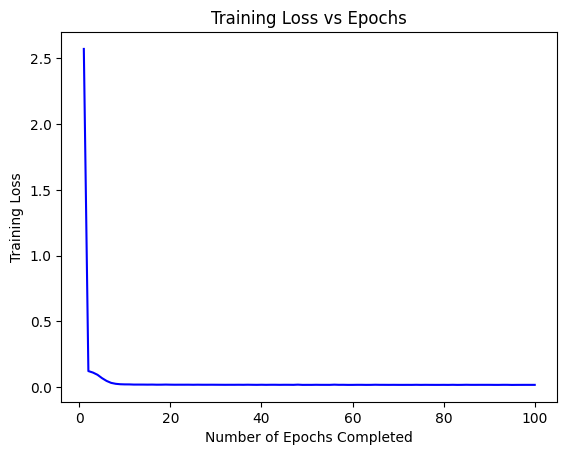

In [19]:
# Visualization of training loss
# • Use matplotlib.pyplot.plot() to visualize training loss over epochs.
training_loss = np.array(training_loss)
epochs = np.array([x for x in range(1,NUM_EPOCHS+1)])
plt.plot(epochs,training_loss,color='blue')
plt.xlabel('Number of Epochs Completed')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epochs')
plt.grid(False)
plt.show()

In [20]:
# Generate a mesh grid
# • Use numpy.linspace() and numpy.meshgrid() to span the data range.
# • Convert the mesh grid to tensors via torch.tensor().

x_range = np.linspace(-10, 10, 100)
X_grid = torch.tensor(x_range, dtype=torch.float32).view(-1, 1)



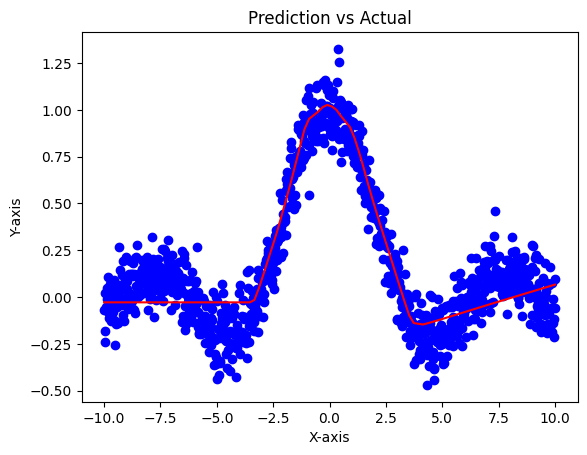

In [21]:
# Prediction over the grid
# • Set the model to evaluation mode using model.eval().
# • Use torch.no_grad() to compute predictions over the grid.
# • Reshape predictions to fit the grid for visualization.

model.eval()
with torch.no_grad():
  predicted = model(X_grid)
  predicted = predicted.view(100)
plt.plot(x_range, predicted, color='red')
plt.scatter(input,output,color='blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Prediction vs Actual')
plt.grid(False)
plt.show()